In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import matplotlib
font = {'size'   : 15}
matplotlib.rc('font', **font)

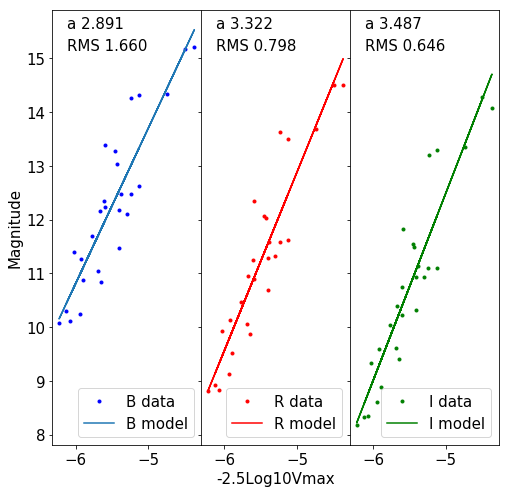

In [2]:
TFtab=ascii.read('TF.rev.dat')
TFtab['vel_cor']=TFtab['W20/2']/np.sin(TFtab['inc']*np.pi/180.)
Bmodel = linear_model.LinearRegression()
Rmodel = linear_model.LinearRegression()
Imodel = linear_model.LinearRegression()

Bmodel.fit(-2.5*np.log10(TFtab['vel_cor'].reshape(-1, 1)), TFtab['B'].reshape(-1, 1))
Rmodel.fit(-2.5*np.log10(TFtab['vel_cor'].reshape(-1, 1)), TFtab['R'].reshape(-1, 1))
Imodel.fit(-2.5*np.log10(TFtab['vel_cor'].reshape(-1, 1)), TFtab['I'].reshape(-1, 1))

f, axarr = plt.subplots(1,3, sharey=True, figsize=(8,8))
axarr[0].plot(-2.5*np.log10(TFtab['vel_cor']), TFtab['B'], 'bo',ms=3, label='B data')
axarr[0].plot(-2.5*np.log10(TFtab['vel_cor']), 
              Bmodel.predict(-2.5*np.log10(TFtab['vel_cor']).reshape(-1,1)).flatten(), label='B model')
axarr[0].legend(loc='lower right')
axarr[2].text(.1,.95, 'a %.3f' %  Bmodel.coef_[0][0],verticalalignment='bottom', horizontalalignment='left',
        transform=axarr[0].transAxes)
axarr[2].text(.1,.90, 'RMS %.3f' %  np.sqrt(np.mean((TFtab['B'] -  Imodel.predict(-2.5*np.log10(TFtab['vel_cor']).reshape(-1,1)).flatten())**2))
              ,verticalalignment='bottom', horizontalalignment='left', transform=axarr[0].transAxes)
axarr[0].set_ylabel('Magnitude')

axarr[1].plot(-2.5*np.log10(TFtab['vel_cor']), TFtab['R'], 'ro',ms=3, label='R data')
axarr[1].plot(-2.5*np.log10(TFtab['vel_cor']), 
              Rmodel.predict(-2.5*np.log10(TFtab['vel_cor']).reshape(-1,1)).flatten(),'r-', label='R model')
axarr[1].legend(loc='lower right')
axarr[1].text(.1,.95, 'a %.3f' %  Rmodel.coef_[0][0],verticalalignment='bottom', horizontalalignment='left',
        transform=axarr[1].transAxes)
axarr[1].text(.1,.90, 'RMS %.3f' %  np.sqrt(np.mean((TFtab['R'] -  Imodel.predict(-2.5*np.log10(TFtab['vel_cor']).reshape(-1,1)).flatten())**2))
              ,verticalalignment='bottom', horizontalalignment='left', transform=axarr[1].transAxes)
axarr[1].set_xlabel('-2.5Log10Vmax')

axarr[2].plot(-2.5*np.log10(TFtab['vel_cor']), TFtab['I'], 'go',ms=3, label='I data')
axarr[2].plot(-2.5*np.log10(TFtab['vel_cor']), 
              Imodel.predict(-2.5*np.log10(TFtab['vel_cor']).reshape(-1,1)).flatten(),'g-', label='I model')
axarr[2].text(.1,.95, 'a %.3f' %  Imodel.coef_[0][0],verticalalignment='bottom', horizontalalignment='left',
        transform=axarr[2].transAxes)
axarr[2].text(.1,.90, 'RMS %.3f' %  np.sqrt(np.mean((TFtab['I'] -  Imodel.predict(-2.5*np.log10(TFtab['vel_cor']).reshape(-1,1)).flatten())**2))
              ,verticalalignment='bottom', horizontalalignment='left', transform=axarr[2].transAxes)

axarr[2].legend(loc='lower right')
f.subplots_adjust(wspace=0)

In [3]:
Bmodel.predict(-2.5*np.log10(TFtab['vel_cor']).reshape(-1,1)).flatten()

array([ 12.52843203,  11.94958262,  10.97563976,  12.53216115,
        11.476339  ,  10.59819835,  11.97399885,  11.70182376,
        12.38752455,  13.33623542,  10.1543903 ,  12.60229191,
        13.00325213,  12.8392622 ,  11.1180517 ,  10.44745609,
        11.76833635,  11.02468781,  11.83598925,  10.72755851,
        11.9795116 ,  15.15187409,  13.02325717,  13.34044675,
        12.44674219,  15.53423669,  14.44271979])

In [4]:
Bmodel.coef_[0][0]

2.8910824885879771

In [5]:
from scipy.optimize import fsolve
def mag_surf(x):
    '''
    calculate surface magnitude using bulge and disk 
    profiles
    '''
    sig_0_disk = 10**-8.366
    sig_0_bulge = 10**-5.469
    sig_disk = sig_0_disk * np.exp(-x/18.)
    sig_bulge = sig_0_bulge * np.exp(-7.67*(x/18.)**.25)
    return -2.5*np.log10(sig_disk + sig_bulge)

def mag():
    '''
    return the surface brightness magnitude 
    we're looking for
    '''
    return 25

def findIntersection(fun1,fun2,x0):
    '''
    numerically find the intersection of 2 functions
    '''
    return fsolve(lambda x : fun1(x) - fun2(),x0)

#calculate R25, use the effective radius as an initial guess
R25 = findIntersection(mag_surf, mag, 18)

#calculate C30
sig_0_disk = 10**-8.366
sig_0_bulge = 10**-5.469
numerator = sig_0_disk * np.exp(-(.3*R25)/18.) + sig_0_bulge * np.exp(-7.67*((.3*R25)/18.)**.25)

denominator= sig_0_disk * np.exp(-(R25)/18.) + sig_0_bulge * np.exp(-7.67*((R25)/18.)**.25)

print numerator/denominator

[ 20.28920353]


In [6]:
R25

array([ 80.00967698])

In [15]:
def mag_surf(x):
    '''
    calculate surface magnitude using bulge and disk 
    profiles
    '''
    sig_0_disk = 10**-8.366
    sig_0_bulge = 10**-5.469
    sig_disk = sig_0_disk * np.exp(-x/18.)
    sig_bulge = sig_0_bulge * np.exp(-7.67*(x/18.)**.25)
    return -2.5*np.log10(sig_disk + sig_bulge)

def mag():
    '''
    return the surface brightness magnitude 
    we're looking for
    '''
    return 25

def findIntersection(fun1,fun2,x0):
    '''
    numerically find the intersection of 2 functions
    '''
    return fsolve(lambda x : fun1(x) - fun2(),x0)

#calculate R25, use the effective radius as an initial guess
R25 = findIntersection(mag_surf, mag, 18)

#calculate C30
import scipy.integrate as integrate
def surf_bright(x):
    '''
    calculate surface brightness
    '''
    sig_0_disk = 10**-8.366
    sig_0_bulge = 10**-5.469
    return sig_0_disk * np.exp(-(x)/18.) + sig_0_bulge * np.exp(-7.67*((x)/18.)**.25)

#find the flux inside .3R25 by integrating over the surface brightness
#and dividing by angular area
numerator = integrate.quad(lambda x: surf_bright(x) ,0,.3*R25) /(.3*R25)**2
#find flux inside R25
denominator= integrate.quad(lambda x: surf_bright(x),0,R25) /(R25)**2

#calculate C30
print numerator[0]/denominator[0]

10.3786824899


In [14]:
denominator

array([  1.27517047e-10,   4.70940126e-13])